<a href="https://colab.research.google.com/github/gsfreitas/engenharia-medica/blob/main/atividade_pratica_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas e funções

In [1]:
# importando as bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import itertools
import scipy.io
import scipy.fft as fft
from scipy.signal import welch
from sklearn import svm
from scipy.stats import shapiro
import seaborn as sns
import operator

In [40]:
def t8_SVM(X,classesX,C=0.1,kernel='linear',tol=0.001,gamma='scale'):
    #Treina uma SVM em um conjunto de dados X
    # INTPUS:
    # - X = matriz padrões x características
    # - classesX = vetor com as classes dos padrões (0 ou 1)
    # - C, kernel e tol são os parâmetros da SVM
    # OUTPUTS:
    # - clf = objeto da SVM
    # - txerro = erro de treinamento
    clf=svm.SVC(C=C,kernel=kernel,tol=tol,gamma=gamma)
    clf.fit(X,classesX)
    for i in range(len(clf.n_support_)):
        print('Numero de vetores de suporte classe '+str(i)+': '+str(clf.n_support_[i]))
    y=clf.predict(X)
    txerro=sum(y!= classesX)/classesX.size
    print('Taxa de erro treinamento: '+str(100*txerro)+'%')
    return clf, txerro

# SVM Linear

**1) [SVM linear]:** Vamos começar esta atividade com dois exercícios para testarmos o algoritmo da SVM. Neste primeiro exercício, vamos empregar a SVM na discriminação de 500 padrões, divididos em duas classes normalmente distribuídas, em um espaço de duas características e que estão salvos no arquivo “Dados_exercício1.mat” *(ver figura 1)*.

In [65]:
# lendo os dados
dados_1 = scipy.io.loadmat('/content/drive/MyDrive/ict-unifesp/2023.2/engenharia-medica/atividade-pratica-8/Dados_exercicio1.mat')['X']
classes_1 = scipy.io.loadmat('/content/drive/MyDrive/ict-unifesp/2023.2/engenharia-medica/atividade-pratica-8/Dados_exercicio1.mat')['classesX']

In [80]:
# separando as classes
e1_class_1 = dados_1[np.where(classes_1 == 1)]
e1_class_2 = dados_1[np.where(classes_1 == 2)]

<Axes: >

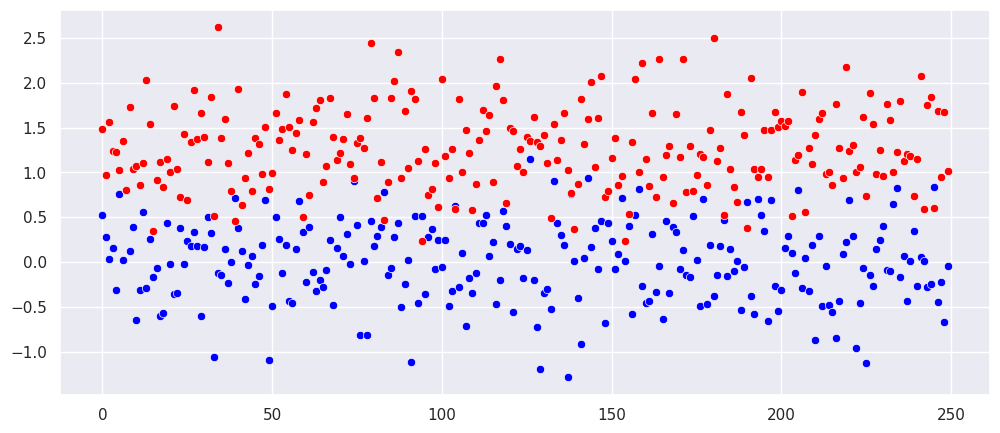

In [85]:
# plot do espaco de caracteristicas
plt.figure(figsize=(12,5))
sns.set_theme()

sns.scatterplot(data=e1_class_1, color='blue', markers='O')
sns.scatterplot(data=e1_class_2, color='red', markers='O')